In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
df = pd.read_csv('HoursExamResult.csv')

In [3]:
df.head(3)

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0


In [4]:
df_pass = df[df['Pass']==1]
df_fail = df[df['Pass']==0]

In [20]:
def linear(x):
    return 1.5046 * x-4.0777

In [ ]:
#y = 1.5046 * hours - 4.0777

In [7]:
1.5046 * 1 - 4.0777

-2.5731

In [11]:
def sigmoid_func(x):
    return 1.0/(1+math.exp(-x))

In [16]:
sigmoid_func(23)
            

0.9999999998973812

In [9]:
df['Hours'].map(lambda x : 1.5046 * x - 4.0777)

0    -3.32540
1    -2.94925
2    -2.57310
3    -2.19695
4    -1.82080
5    -1.44465
6    -1.44465
7    -1.06850
8    -0.69235
9    -0.31620
10    0.05995
11    0.43610
12    0.81225
13    1.18840
14    1.94070
15    2.31685
16    2.69300
17    3.06915
18    3.44530
19    4.19760
Name: Hours, dtype: float64

(-0.5, 1.5)

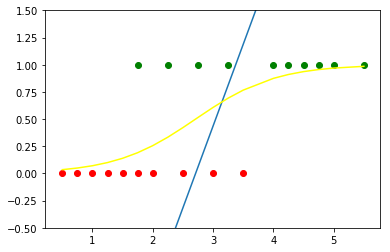

In [17]:
plt.scatter(df_pass['Hours'], df_pass['Pass'], color='green')
plt.scatter(df_fail['Hours'], df_fail['Pass'], color='red')
y = df['Hours'].map(lambda x : 1.5046 * x-4.0777)
plt.plot(df['Hours'], y )
plt.plot(df['Hours'], y.map(sigmoid_func), color='yellow')

#plt.plot(df['Hours'], df['Hours'].map(linear))

plt.ylim(-.5,1.5)

In [19]:
df['prob'] = y.map(sigmoid_func) 

In [20]:
df

,Hours,Pass,prob
0,0.50,0,0.034710
1,0.75,0,0.049772
2,1.00,0,0.070890
3,1.25,0,0.100025
4,1.50,0,0.139338
5,1.75,0,0.190826
6,1.75,1,0.190826
7,2.00,0,0.255688
8,2.25,1,0.333511
9,2.50,0,0.421602


In [18]:
df['sigmoid'] = df['Hours'].map(lambda x : sigmoid_func(linear(x)))

NameError: name 'linear' is not defined

In [28]:
df

,Hours,Pass,sigmoid
0,0.50,0,0.034710
1,0.75,0,0.049772
2,1.00,0,0.070890
3,1.25,0,0.100025
4,1.50,0,0.139338
5,1.75,0,0.190826
6,1.75,1,0.190826
7,2.00,0,0.255688
8,2.25,1,0.333511
9,2.50,0,0.421602


In [17]:
def sigmoid_func(x):
    return 1.0/(1+math.exp(-x))

In [19]:
sigmoid_func(-300)

5.148200222412014e-131

In [57]:
df[ df['Pass'] ==1 ]['Hours']

6     1.75
8     2.25
10    2.75
12    3.25
14    4.00
15    4.25
16    4.50
17    4.75
18    5.00
19    5.50
Name: Hours, dtype: float64

In [58]:
def le(x):
    y = x * 1.5046 - 4.0777
    return y
    

In [59]:
y_lr = df['Hours'].map(le)

In [61]:
y_sig = y_lr.map(sigmoid_func)

In [62]:
list(zip(y_sig, y_lr))

[(0.034710024943083076, -3.3254),
 (0.04977197062456905, -2.94925),
 (0.07088985238612801, -2.5731),
 (0.10002471467454026, -2.19695),
 (0.139337906994004, -1.8208000000000002),
 (0.1908263020604273, -1.4446500000000002),
 (0.1908263020604273, -1.4446500000000002),
 (0.25568844734059615, -1.0685000000000002),
 (0.33351050809954036, -0.6923500000000002),
 (0.42160211509287904, -0.31620000000000026),
 (0.5149830128533023, 0.059949999999999726),
 (0.6073293474722868, 0.4360999999999997),
 (0.6925887583050957, 0.8122499999999997),
 (0.7664547833815967, 1.1883999999999997),
 (0.8744290256656763, 1.9406999999999996),
 (0.9102629674354283, 2.3168499999999996),
 (0.9366123241659486, 2.6929999999999996),
 (0.9556021236741449, 3.0691499999999996),
 (0.9690906670606583, 3.4452999999999996),
 (0.9851909937709535, 4.1975999999999996)]

(-0.5, 1.5)

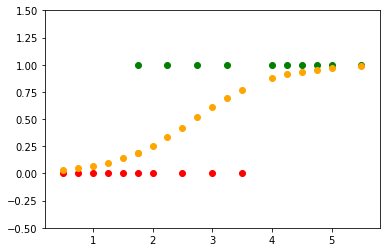

In [63]:
plt.scatter(df[ df['Pass'] ==1 ]['Hours'],df[ df['Pass'] ==1 ]['Pass'], color='green' )
plt.scatter(df[ df['Pass'] ==0 ]['Hours'],df[ df['Pass'] ==0 ]['Pass'], color='red' )
#plt.scatter(df['Hours'], y_lr)
plt.scatter(df['Hours'], y_sig, color='orange')
plt.ylim(-0.5, 1.5)

In [64]:
def le(x):
    return x * 1.5046 - 4.0777

In [65]:
df['prob'] = y_sig

In [51]:
pass_pred = df[df['prob']> 0.5]
fail_pred = df[df['prob']<= 0.5]


In [66]:
df['pred'] = df['prob']> 0.5

In [68]:
df['pred'] = df['pred'].map(lambda x : 1 if x else 0) 

In [71]:
df[df['Pass'] != df['pred']]

,Hours,Pass,prob,pred
6,1.75,1,0.190826,0
8,2.25,1,0.333511,0
11,3.00,0,0.607329,1
13,3.50,0,0.766455,1


In [73]:
16/len(df)

0.8

In [74]:
len(df[df['Pass']==1])/20

0.5

In [75]:
len(df[df['Pass']==0])/20

0.5

<h4>Classification Overview</h4>
<ul>
<li>Predict a binary class as output based on given features.
</li>

<li>Examples: Do we need to follow up on a customer review? Is this transaction fraudulent or valid one? Are there signs of onset of a medical condition or disease? Is this considered junk food or not?</li>

<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>

<li><b>Logistic Regression</b>. Estimated Probability = <b>sigmoid</b>(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub>)<br>
where, w is the weight and x is the feature
</li>
<li>Linear model output is fed thru a sigmoid or logistic function to produce the probability.</li>
<li>Predicted Value: Probability of a binary outcome.  Closer to 1 is positive class, closer to 0 is negative class</li>
<li>Algorithm Used: Logistic Regression. Objective is to find the weights w that maximizes separation between the two classes</li>
<li>Optimization: Stochastic Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Logistic loss function</li>
</ul>